## Codebook

`megafon.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

### Разведочный анализ данных

In [2]:
#загрузка данных
data = pd.read_csv('megafon.csv')
data.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


In [1110]:
#смторим, какие типы данных и кол-во пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

Видим, что есть пропущенные в Q1 и Q2, им надо будет уделить особое внимание, скорее всего понадобится дополнительная обработка данных.

Посмотрим, сколько у нас пропущенных значений.

In [1111]:
data.isna().sum()

user_id                                         0
Q1                                              2
Q2                                           1797
Total Traffic(MB)                               0
Downlink Throughput(Kbps)                       0
Uplink Throughput(Kbps)                         0
Downlink TCP Retransmission Rate(%)             0
Video Streaming Download Throughput(Kbps)       0
Video Streaming xKB Start Delay(ms)             0
Web Page Download Throughput(Kbps)              0
Web Average TCP RTT(ms)                         0
dtype: int64

В Q1 всего 2 пропущенных значения, видимо пользователи не стали проходить опрос, их нужно будет удалить, так как мы не сможем их оценить.

В Q2 пропущено 1797 значений, что достаточно много, учитывая, что объем выборки всего 3112. Пропущены могут быть значения, если клиент ответил в опросе 9-10, это значит, что его устраивает качество обслуживания, или же клиент просто не конкретизировал причину недовольства.

Посмотрим дополнительно на данные ответы по каждому из пунктов:

In [1112]:
data.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

Помимо ожидаемых ответов на вопрос от 1 до 10, есть дополнительные ответы, которые не вписываются в общую схему исследования. Некоторые ответы записаны через запятую, например, "1,3", очевидно, что опрошенный клиент не доволен качеством, но уже не так очевидно, какую из этих цифр нам брать в расчет. 

Надо посчитать, какой процент таких ответов от всего общего массива данных, чтобы убедиться, что удаление этих данных не скажется критическим образом на выборке.

In [3]:
data = data[-data.Q1.isna()]

mark_list = [str(mark) for mark in np.arange(1, 11)]

error_percent = 1 - data[data['Q1'].isin(mark_list)]['Q1'].count()/data['Q1'].count()

error_count = data[-data['Q1'].isin(mark_list)]['Q1'].count()

print(f'error_percent - {error_percent:.2%}')
print(f'error_count - {error_count}')

error_percent - 1.67%
error_count - 52


52 значения из выборки в 3 000 значений, что составляет 1.67%. Для целей дальнейшего подсчета и упрощения, можно удалить эти ответы.

In [4]:
#data = pd.read_csv('megafon.csv')
data = data[data['Q1'].isin(mark_list)]
data.Q1 = data.Q1.astype(int)

Посмотрим теперь, какие ответы были даны на второй вопрос:

In [1115]:
data.Q2.unique()

array([nan, '4', '3', '2, 3, 4', '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '3, 4', '1, 2', '3, 5', '1', '7', '1, 4', '1, 2, 3, 4, 5', '2, 3',
       '1, 2, 3, 4', '2, 3, 4, 5', '3, 4, 5', '1, 2, 5', '1, 5',
       '1, 2, 4', '6', '1, 4, 5', '1, 2, 3', '2, 5', '2, 4, 5', '1, 2, 7',
       '5', '2', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7', '1, 4, 7', '0, 3',
       '1, 3, 4, 5, 7', '3, 7', '1, 3, 4, 7', '3, 4, 5, 7', '2, 4',
       '5, 6', '1, 2, 3, 5', '1, 3, 5', '1, 2, 34', '1, 2, 4, 5',
       '0, 05, 2, 27, 7', '1, 3, 7', '3, 4, 7', '1, 2, 3, 4, 7', '10',
       '0', '1, 2, 3, 7'], dtype=object)

Можно отметить, что некоторые клиенты указывают сразу несколько причин, нужно будет учесть их все. Также есть варианты 0, 8, 10, 27, 34. При этом нет ни одной причины, хотя вариант 7, который предпологает наличие как раз другой причины, в списке ответов присутствует.

Преобразуем те нестандартные варианты ответов, которые были даны, по следующей схеме:

- 05 -> 5
- 27 -> 2,7
- 34 -> 3,4
- 10 -> 1

Преобразование исходит из предположения, что опрашиваемый просто не поставил запятые во время ответа на вопрос.

Заполним NA как 0, так как у нас нет такого варианта ответа все равно, а мы не можем просто отбросить эти значения, так как в случае, если эти клиенты поставили оценку ниже 9, то они не очень довольны сервисом, а значит их тех.параметры мы можем использовать в дальнейшем для расчета и анализа гипотез.

In [6]:
#преобразование Q2 
#data = pd.read_csv('megafon.csv')

data['Q2'] = data['Q2'].fillna('0')

f = lambda x: x.split()

data['Q2'] = data.loc[:, 'Q2'].apply(f)

for i in list(range(data.Q2.size)):
    for j in range(len(data.Q2[i])):
            data.Q2[i][j] = data.Q2[i][j].replace('05', '5').\
                                      replace('10', '1').replace(',', '')
            if int(data.Q2[i][j]) > 8:
                first_part = int(data.Q2[i][j])//10
                second_part = int(data.Q2[i][j])%10
                data.Q2[i].remove(data.Q2[i][j])
                data.Q2[i].append(str(first_part)) 
                data.Q2[i].append(str(second_part))
                
data = data.explode('Q2')
data = data[data['Q1'].isin(mark_list)]
data.Q1 = data.Q1.astype(int)

#преобразованный датасет
data.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,0,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,2,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


Теперь мы можем посмотреть на графиках распределение вариантов ответов по вопросам в первом и втором случае. Для начала посмотрим на bar chart, он покажет нам абсолютные количества ответов, а затем посмотрим на pie chart, он покажет нам кол-во ответов по отношению к общей выборке. 

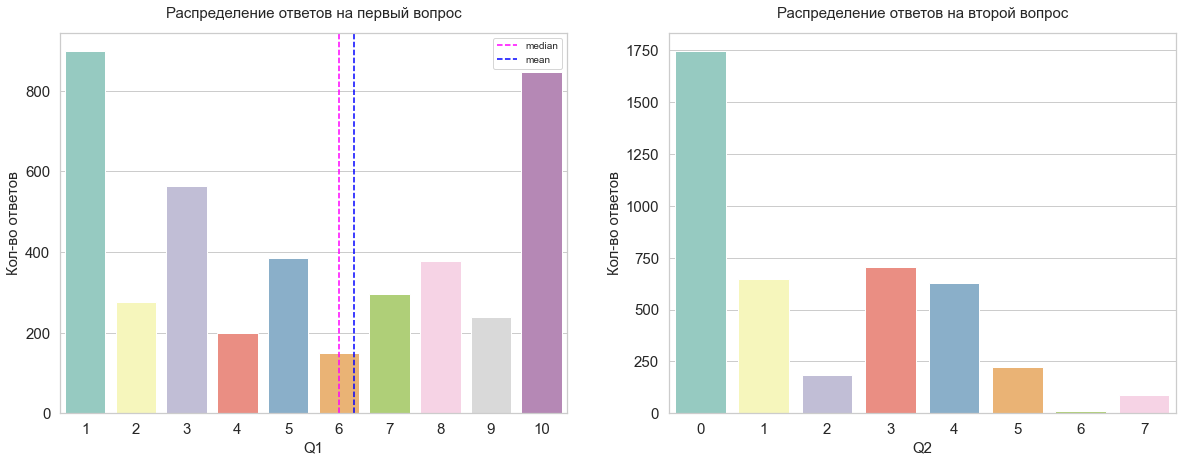

In [8]:
fig = plt.subplots(figsize = (20, 7))
sns.set_theme(style="whitegrid")

plt.subplot(1, 2, 1)
plt.axvline(data['Q1'].median(), linestyle = 'dashed', color = 'magenta', label = 'median')
plt.axvline(data['Q1'].mean(), linestyle = 'dashed', color = 'blue', label = 'mean')
sns.countplot(x = "Q1", data = data, palette="Set3")
plt.title('Распределение ответов на первый вопрос', fontsize = 15, pad = 15)
plt.ylabel('Кол-во ответов', fontsize = 15)
plt.xlabel('Q1', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize = 10, loc = 'best')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Q2', data = data, order = ['0', '1', '2', '3', '4', '5', '6', '7'], palette="Set3")
plt.title('Распределение ответов на второй вопрос', fontsize = 15, pad = 15)
plt.ylabel('Кол-во ответов', fontsize = 15)
plt.xlabel('Q2', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

#### По первому вопросу:

Медиана и среднее почти совпадают и находятся на оценке 6. Это говорит о том, что кол-во людей довольных сервисом все-таки чуть больше, чем недовольных совсем. 

Больше всего негативных ответов, но если смотреть в процентном соотношении, то кол-во ответов с оценкой 1 и оценкой 10 примерно одинаковое. Такую полярность можно объяснить тем, что отзывы охотнее дают люди, которые либо очень довольны, либо совсем недовольны. При этом нельзя совсем игнорировать, что возможной причиной таких низких оценок также могут быть технические проблемы.

#### По второму вопросу:

Заметно, что больше всего ответов 0, но мы помним, что нулями были заполнены все пропуски NA в этом столбце, поэтому по большей части это число ответов говорит нам о кол-ве пропусков.

Если отбросить ноль, то у нас выделяются три основные причины неудовлетворенности сервисом, над которыми надо работать:
 - 1 - недозвоны, обрывы при звонках
 - 3 - плохое качество связи в зданиях
 - 4 - медленный мобильный Интернет

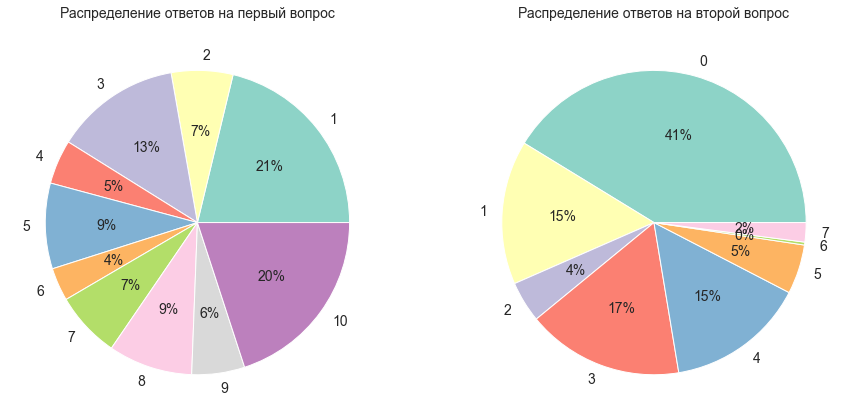

In [883]:
colors = sns.color_palette('Set3')[0:10]

fig = plt.subplots(figsize = (15, 15))

plt.subplot(1, 2, 1)
plt.pie(x = data.groupby('Q1')['user_id'].count().reset_index().user_id, colors = colors, \
        labels = data.groupby('Q1')['user_id'].count().reset_index().Q1, autopct = '%.0f%%',\
        textprops = {'fontsize':14})
plt.title('Распределение ответов на первый вопрос', fontsize = 14, pad = 15)

plt.subplot(1, 2, 2)
plt.pie(x = data.groupby('Q2')['user_id'].count().reset_index().user_id, colors = colors, \
        labels = data.groupby('Q2')['user_id'].count().reset_index().Q2, autopct = '%.0f%%',\
        textprops = {'fontsize': 14})
plt.title('Распределение ответов на второй вопрос', fontsize = 14, pad = 15)

plt.show()

- 21% клиентов поставил самую низшую оценку 1, при этом 20% поставили самую высокую оценку - 10;
- 41% нулей, объяснение этому есть выше; самые часто встречащиеся проблемы - это
   - 1 - недозвоны, обрывы при звонках - 15%
   - 3 - плохое качество связи в зданиях - 17%
   - 4 - медленный мобильный Интернет - 15%

Теперь необходимо оценить технические параметры для каждой из групп клиентов и посмотреть, есть ли какая-то зависимость между тех. парамтерами и уровнем оценок, которые пользователи дали в ходе опроса.

Если удастся обнаружить зависимость на графиках, нужно будет дополнительно потом подтвердить ее статистическим тестом.

Если есть показатели, которые имеют корреляцию друг с другом, отследив это можно добиться улучшения одного показателя, добившись также улучшения для второго. Это поможет сконцентрироваться на одном показателе вместо двух, это сэкономит время и ресурсы.

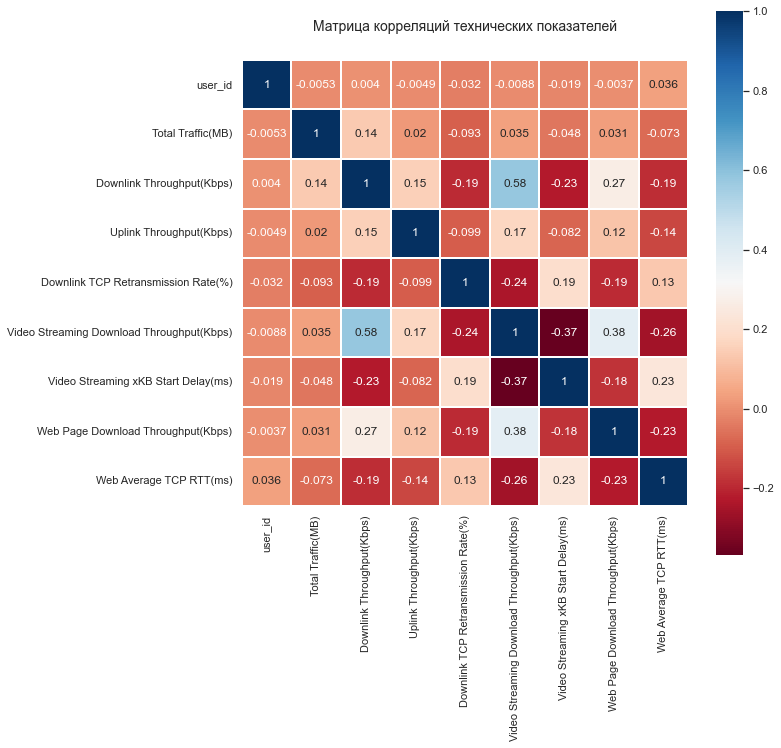

In [1095]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('Матрица корреляций технических показателей', y = 1.05, fontsize = 14)
sns.heatmap(data.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white',\
           annot = True)

plt.show()

Исходя из матрицы корреляций, можно говорить о заметной корреляции между двумя признаками:

Video Streaming Download Throughput и Downlink Throughput с коэффициентом 0.58.

Далее найдем медианные значения для каждой группы технических показателей и визуализируем их: 

In [919]:
data_median =  data.groupby('Q1').median()
data_median

,user_id,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
Q1,,,,,,,,,
1,1641.0,352.76626,1099.44,102.240,1.510,3108.00,1873.0,1363.48,149.0
2,1591.0,359.80489,976.55,103.830,1.660,4044.31,1811.0,1544.44,99.0
3,1535.0,345.20426,1102.17,123.410,1.470,3243.32,1848.0,1508.64,156.0
4,1621.0,483.36885,1400.57,121.580,1.420,3385.85,1701.0,1485.46,124.0
5,1516.0,377.57691,1227.97,119.750,1.410,4018.92,1706.0,1518.26,123.0
6,1611.0,463.84425,1841.90,149.580,1.210,5223.63,1738.0,1745.61,107.0
7,1506.0,364.44074,1458.62,118.680,1.450,4405.26,1623.0,1792.11,123.0
8,1469.0,343.66801,1424.20,125.070,1.190,5016.87,1611.0,1744.63,113.0
9,1646.0,347.91350,1653.08,126.910,1.090,4974.81,1531.0,1856.23,100.0


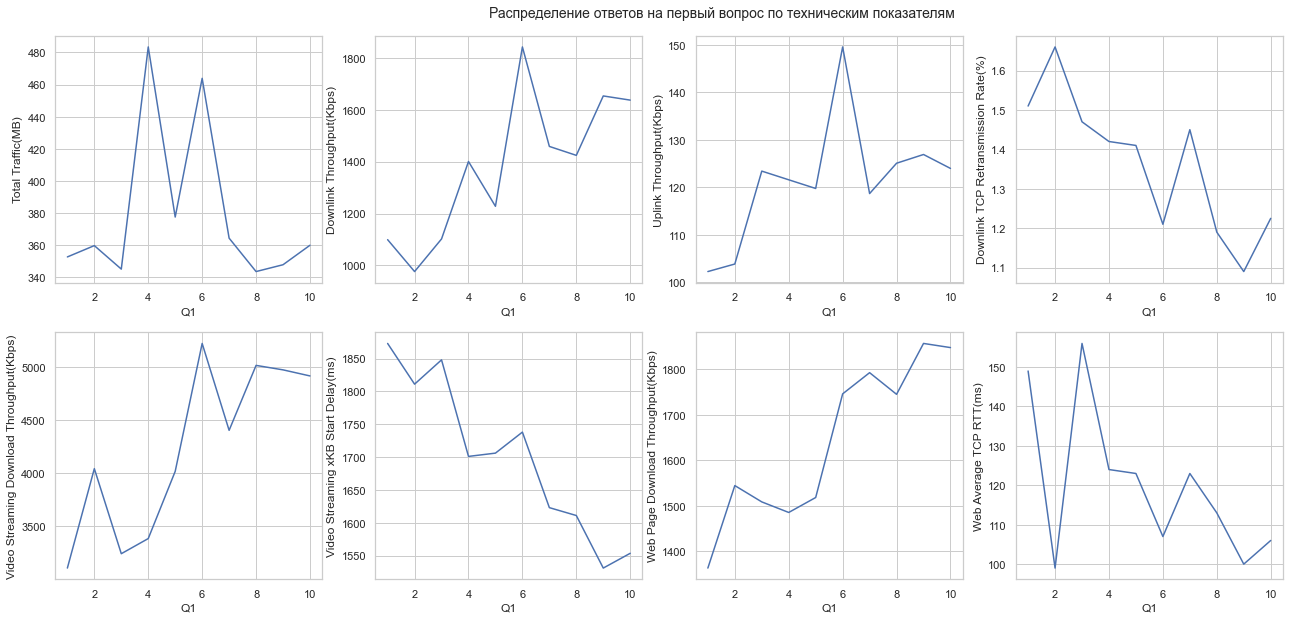

In [996]:
fig = plt.subplots(figsize = (22, 10))

for j in range(1, len(list(data_median.columns[1:]))+1):
    plt.subplot(2, 4, j)
    sns.lineplot(x = "Q1", y = data_median.columns[1:][j-1], data = data_median)

plt.title('Распределение ответов на первый вопрос по техническим показателям', fontsize = 14, y = 2.25, x = -1.1)

plt.show()

Определенную тенденцию можно увидеть у

- Downlink TCP Retransmission Rate(%), чем ниже, тем лучше, меньше ошибок и переотправок пакета, выше полезная скорость.
- Video Streaming xKB Start Delay(ms), чем ниже, тем лучше, быстрее начинается воспроизведение видео. 
- Web Page Download Throughput(Kbps), чем выше, тем лучше. 

У Total Traffic(MB) и Uplink Throughput(Kbps) наибольшие значения наблюдаются в ответах 4 и 6, а далее идет снижение, а значит улучшение этих технических параметров не поможет поднять оценку до 9-10.

У Downlink Throughput(Kbps) и Video Streaming Download Throughput(Kbps) похожая ситуация, показатель достигает максимумов на оценке в 6 и больше не растет.

У Web Average TCP RTT(ms) сложно однозначно проследить зависимость, похоже на выброс в данных, поэтому сложно сделать однозначный вывод о влиянии этого параметра на оценки пользователей.

### Статистический тест

#### Гипотеза 1

Выдвигаем нулевую гипотезу: 

Медианные значения Video Streaming Start Delay в двух группах не отличаются.

Делим наши данные на две группы:
- те, кто поставил на первый вопрос оценку от 1 до 8
- те, кто поставил на первый вопрос оценку от 9 до 10

Проверять будем с помощью доверительных интервалов на основе bootstrap из-за несбалансированности выборок и небольшого количества наблюдений. 
Если полученные доверительные интервалы не будут пересекаться, то отвергаем нулевую гипотезу.
Уровень значимости берем равный 0,05.

In [9]:
#формируем группы
good_data = data[(data['Q1']== 9)|(data['Q1']== 10)]
bad_data = data[(data['Q1']!= 9)&(data['Q1']!= 10)]

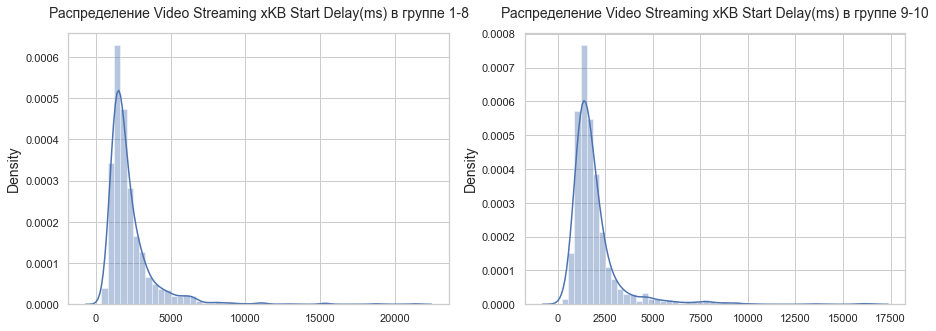

In [1197]:
#посмотрим на распределение показателя Video Streaming Start Delay в двух группах

fig = plt.subplots(figsize = (15, 5), sharey = True)

plt.subplot(1, 2, 2)
sns.distplot(good_data, x = good_data['Video Streaming xKB Start Delay(ms)'], kde = True)
plt.title('Распределение Video Streaming xKB Start Delay(ms) в группе 9-10', fontsize = 14, pad = 15)
plt.xlabel('', fontsize = 30)
plt.ylabel('Density', fontsize = 14)

plt.subplot(1, 2, 1)
sns.distplot(bad_data, x = bad_data['Video Streaming xKB Start Delay(ms)'])
plt.title('Распределение Video Streaming xKB Start Delay(ms) в группе 1-8', fontsize = 14, pad = 15)
plt.ylabel('Density', fontsize = 14)

plt.show()

Распределения немного скошены, но похожи друг на друга.

In [10]:
#функция для бутстрапа
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

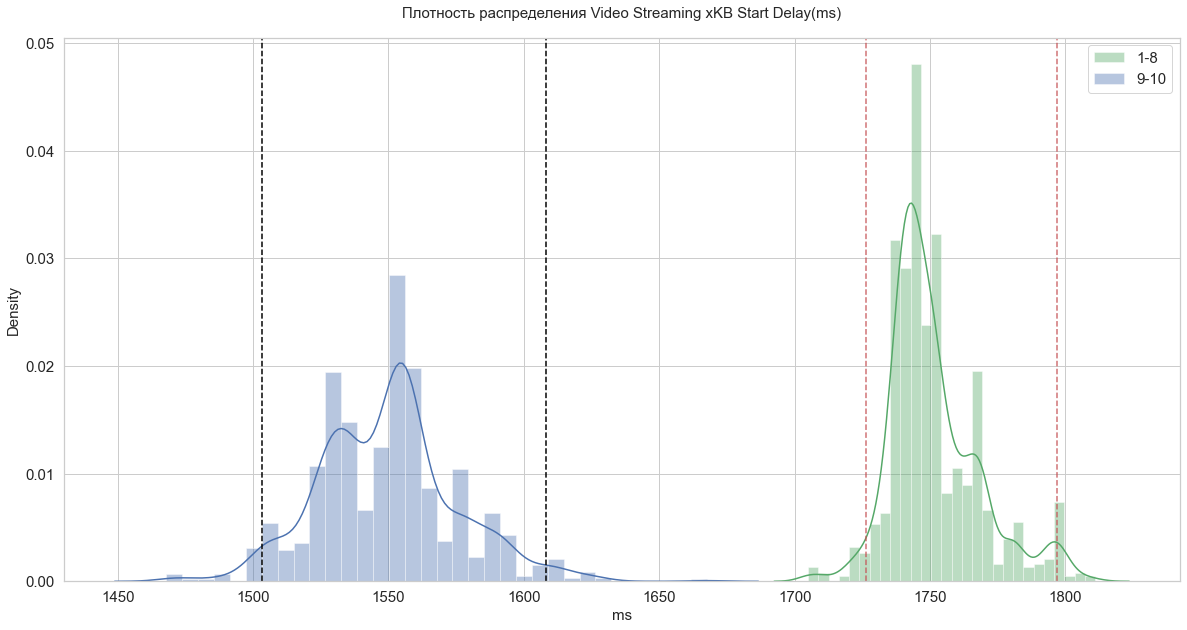

In [11]:
#строим доверительные интервалы
colors = sns.color_palette('Set3')

good_lim = good_data['Video Streaming xKB Start Delay(ms)'].values
bad_lim = bad_data['Video Streaming xKB Start Delay(ms)'].values

good_medians = get_bootstrap_samples(good_lim, 1000)
bad_means = get_bootstrap_samples(bad_lim, 1000)

good_median_scores = np.median(good_medians, axis = 1)
bad_median_scores = np.median(bad_means, axis = 1)

fig = plt.subplots(figsize = (20, 10))
ax = sns.distplot(bad_median_scores, label = '1-8', color = 'g')   
sns.distplot(good_median_scores, ax = ax,label = '9-10')

ax.legend(fontsize = 15, loc = 'upper right')
ax.axvline(np.percentile(good_median_scores,2.75),linestyle = '--',color='black')
ax.axvline(np.percentile(good_median_scores,97.75),linestyle = '--',color='black')

ax.axvline(np.percentile(bad_median_scores,2.75),linestyle = '--',color='r', alpha = 0.8)
ax.axvline(np.percentile(bad_median_scores,97.75),linestyle = '--',color='r', alpha = 0.8)
plt.xlabel('ms', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Плотность распределения Video Streaming xKB Start Delay(ms)', fontsize = 15, pad = 20)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

Интервалы не пересекатся, значит разница есть. У нас есть основания отвергнуть нулевую гипотезу на уровне значимости 0,05.

#### Гипотеза 2

Выдвигаем новую нулевую гипотезу: 

Медианные значения Downlink TCP Retransmission Rate(%) в двух группах не отличаются.

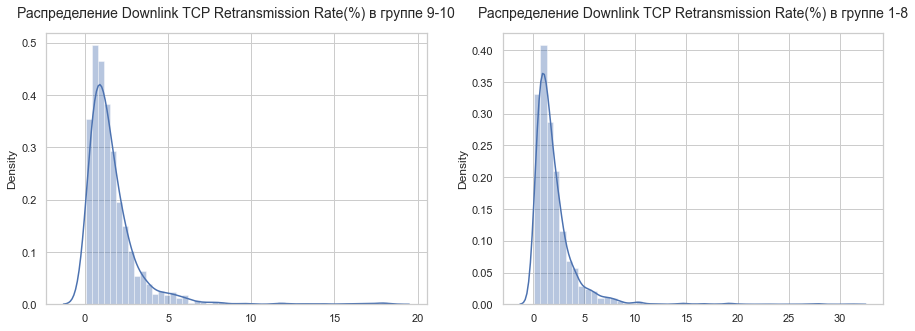

In [1098]:
#посмотрим на распределение показателя Downlink TCP Retransmission Rate(%) в двух группах
fig = plt.subplots(figsize = (15, 5), sharey = True)

plt.subplot(1, 2, 1)
sns.distplot(good_data, x = good_data['Downlink TCP Retransmission Rate(%)'], kde = True)
plt.title('Распределение Downlink TCP Retransmission Rate(%) в группе 9-10', fontsize = 14, pad = 15)

plt.subplot(1, 2, 2)
sns.distplot(bad_data, x = bad_data['Downlink TCP Retransmission Rate(%)'])
plt.title('Распределение Downlink TCP Retransmission Rate(%) в группе 1-8', fontsize = 14, pad = 15)

plt.show()

Распределения немного скошены, но похожи друг на друга.

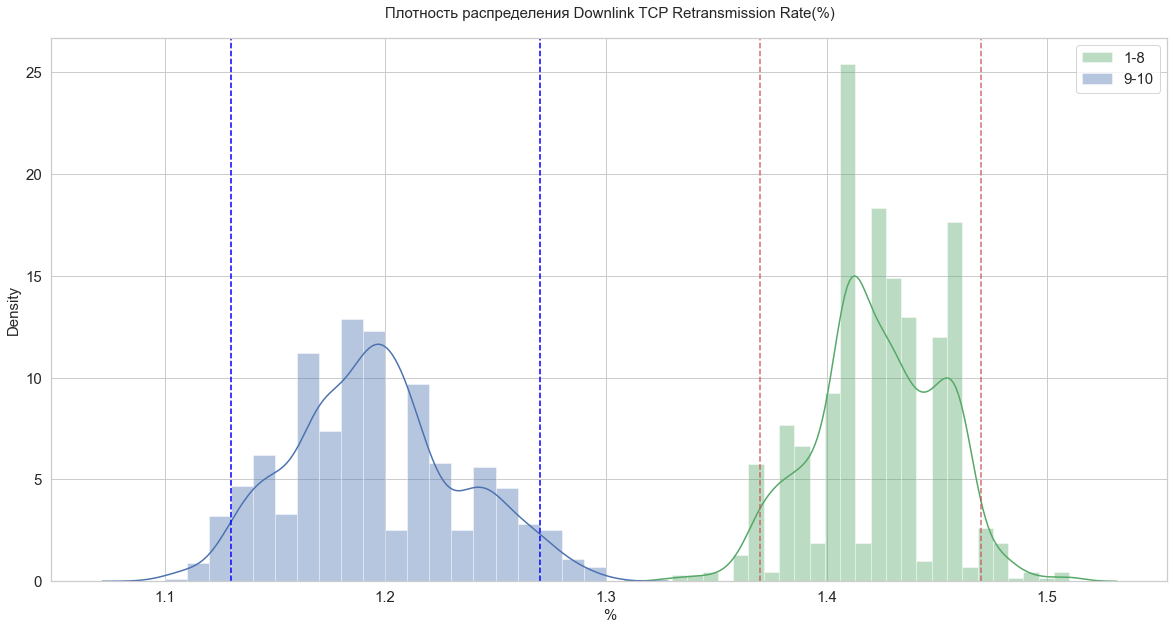

In [12]:
#строим доверительные интервалы
good_lim = good_data['Downlink TCP Retransmission Rate(%)'].values
bad_lim = bad_data['Downlink TCP Retransmission Rate(%)'].values

good_medians = get_bootstrap_samples(good_lim, 1000)
bad_means = get_bootstrap_samples(bad_lim, 1000)

good_median_scores = np.median(good_medians, axis = 1)
bad_median_scores = np.median(bad_means, axis = 1)

fig = plt.subplots(figsize = (20, 10))
ax = sns.distplot(bad_median_scores, label = '1-8', color = 'g')   
sns.distplot(good_median_scores, ax = ax,label = '9-10')

ax.legend(fontsize = 15)
ax.axvline(np.percentile(good_median_scores,2.75),linestyle = '--',color='blue')
ax.axvline(np.percentile(good_median_scores,97.75),linestyle = '--',color='blue')

ax.axvline(np.percentile(bad_median_scores,2.75),linestyle = '--',color='r', alpha = 0.8)
ax.axvline(np.percentile(bad_median_scores,97.75),linestyle = '--',color='r', alpha = 0.8)
plt.xlabel('%', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Плотность распределения Downlink TCP Retransmission Rate(%)', fontsize = 15, pad = 20)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

Интервалы не пересекаются, значит разница есть. У нас есть основания отвергнуть нулевую гипотезу на уровне значимости 0,05.

#### Гипотеза 3

Выдвигаем новую нулевую гипотезу: 

Медианные значения Web Page Download Throughput(Kbps) в двух группах не отличаются.

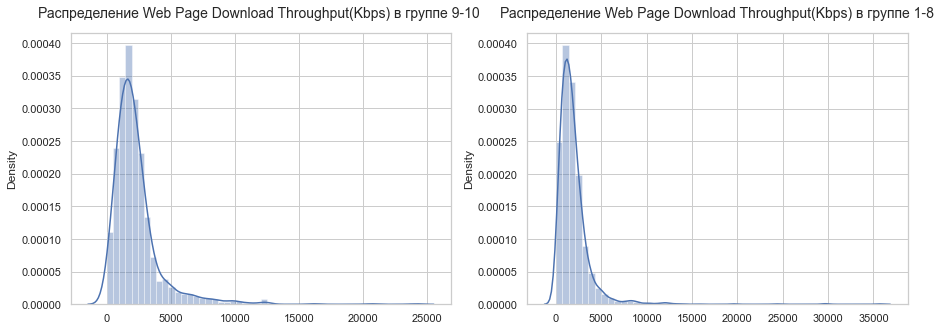

In [1103]:
#посмотрим на распределение показателя Web Page Download Throughput(Kbps) в двух группах
fig = plt.subplots(figsize = (15, 5), sharey = True)

plt.subplot(1, 2, 1)
sns.distplot(good_data, x = good_data['Web Page Download Throughput(Kbps)'], kde = True)
plt.title('Распределение Web Page Download Throughput(Kbps) в группе 9-10 ', fontsize = 14, pad = 15)

plt.subplot(1, 2, 2)
sns.distplot(bad_data, x = bad_data['Web Page Download Throughput(Kbps)'])
plt.title('Распределение Web Page Download Throughput(Kbps) в группе 1-8', fontsize = 14, pad = 15)

plt.show()

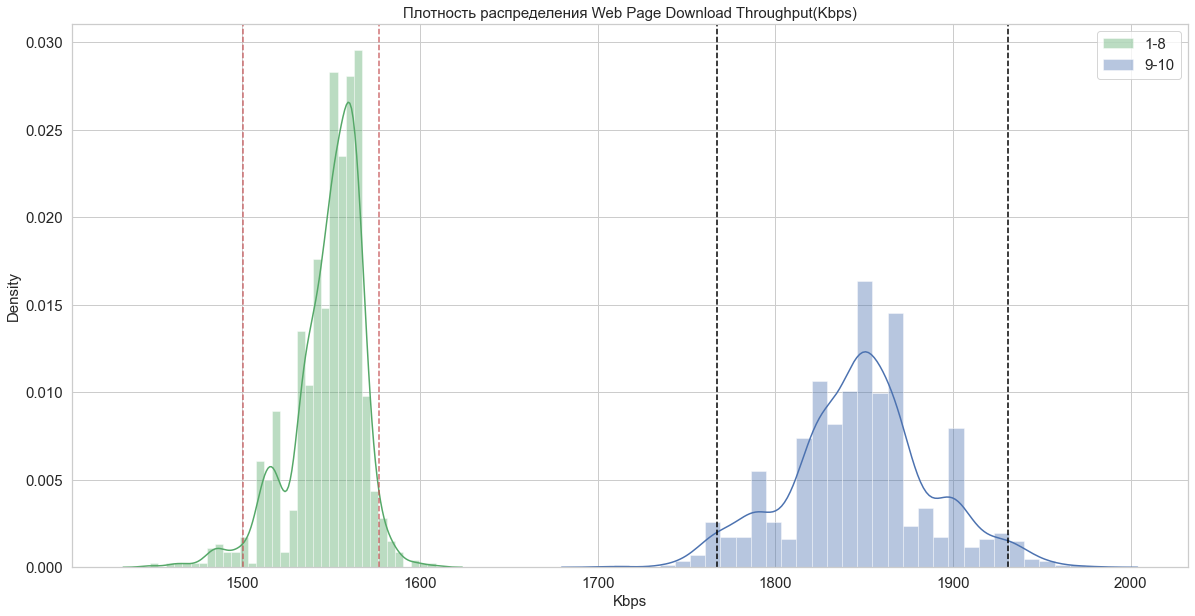

In [13]:
#строим доверительные интервалы
colors = sns.color_palette('Set3')

good_lim = good_data['Web Page Download Throughput(Kbps)'].values
bad_lim = bad_data['Web Page Download Throughput(Kbps)'].values

good_medians = get_bootstrap_samples(good_lim, 1000)
bad_means = get_bootstrap_samples(bad_lim, 1000)

good_median_scores = np.median(good_medians, axis = 1)
bad_median_scores = np.median(bad_means, axis = 1)

fig = plt.subplots(figsize = (20, 10))
ax = sns.distplot(bad_median_scores, label = '1-8', color = 'g')   
sns.distplot(good_median_scores, ax = ax,label = '9-10')

ax.legend(fontsize = 15)
ax.axvline(np.percentile(good_median_scores,2.75),linestyle = '--',color='black')
ax.axvline(np.percentile(good_median_scores,97.75),linestyle = '--',color='black')

ax.axvline(np.percentile(bad_median_scores,2.75),linestyle = '--',color='r', alpha = 0.8)
ax.axvline(np.percentile(bad_median_scores,97.75),linestyle = '--',color='r', alpha = 0.8)
plt.xlabel('Kbps', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Плотность распределения Web Page Download Throughput(Kbps)', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

Интервалы не пересекаются, значит разница есть. У нас есть основания отвергнуть нулевую гипотезу на уровне значимости 0,05.

### Вывод:

- только треть пользователей поставили в опросе 9 или 10, что составляет 26% от общего числа пользователей;


- 1797 пропущенных значения в Q2 (что составляет 41% от общего чила ответов), учитывая, что примерно 1000 пользователей довольны сервисом, получается что 800 человек остались не удовлетворены качеством и при этом не сообщили конкретную причину;


- кол-во ответов с оценкой 1 (21% от общего числа ответов) и оценкой 10 (20% от общего числа ответов) примерно одинаковое; 


- три основные причины неудовлетворенности сервисом, которые были названы клиентами в ходе опроса:
   - 1 - недозвоны, обрывы при звонках - 15%
   - 3 - плохое качество связи в зданиях - 17%
   - 4 - медленный мобильный Интернет - 15%
   
   
- обнаружена заметная корреляция между параметрами Video Streaming Download Throughput и Downlink Throughput с коэффициентом 0.58;


- однозначную взаимосвязь между улучшениями технических показателей и увеличением оценки от пользователей можно увидеть у
   - Downlink TCP Retransmission Rate(%)
   - Video Streaming xKB Start Delay(ms)
   - Web Page Download Throughput(Kbps)
   
   
- статистический тест на основе bootstrap также подтвердил, что есть существенная разница в технических показателях из предыдущего пункта между двумя группами (теми, кто поставил оценки от 1 до 8 и теми, кто поставил оценки от 9 до 10). 

Таким образом есть основания полагать, что улучшение этих показателей приведет к улучшению качества обслуживания и повышению удовлетворенности клиентов сервисом компании.